In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import os
import seaborn as sns
import cv2
from random import randint
from sklearn.model_selection import train_test_split


In [2]:
os.getcwd()
os.chdir('/Users/Aron/Kaggle/plant_pathology')

In [3]:
sample_submission = pd.read_csv('plant-pathology-2020-fgvc7/sample_submission.csv')
test = pd.read_csv('plant-pathology-2020-fgvc7/test.csv')
train = pd.read_csv("plant-pathology-2020-fgvc7/train.csv")

In [4]:
train.head()


,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


The sample submission file, the training data and testing labels are read in.  ther eare 1821 training and testing images in the dataset.Next is to look at the distribution of the training set ategories.  

There are 4 categories.  check to make sure there is a fatir representation of each of the 4 categories.

image_id             Train_0Train_1Train_2Train_3Train_4Train_5Trai...
healthy                                                            516
multiple_diseases                                                   91
rust                                                               622
scab                                                               592
dtype: object


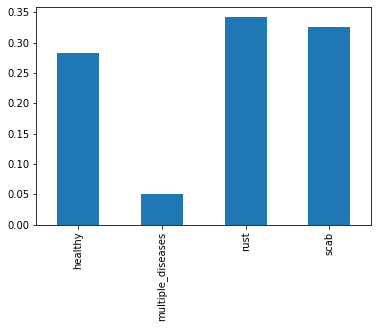

In [5]:
# since each image can only be represented in each column once, 
# the mean of the columns are the percentage each column is of the data.
print(train.sum())
pcts = train.mean()
pcts.plot(kind = 'bar')


We can see that the multiple disease column is the least represented in the data.  

In [6]:
train['image_id']


0          Train_0
1          Train_1
2          Train_2
3          Train_3
4          Train_4
           ...    
1816    Train_1816
1817    Train_1817
1818    Train_1818
1819    Train_1819
1820    Train_1820
Name: image_id, Length: 1821, dtype: object

lets check out a couple of the images from the training set.

In [7]:
#Check image size
im = cv2.imread('plant-pathology-2020-fgvc7/images/Train_0.jpg')
print(type(im))
print(im.shape)
print(type(im.shape))

<class 'numpy.ndarray'>
(1365, 2048, 3)
<class 'tuple'>


#now resize and look at them

In [8]:
img_size = 150
train_image = []
for name in train['image_id']:
    path='plant-pathology-2020-fgvc7/images/'+name+'.jpg'
    img=cv2.imread(path)
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    train_image.append(image)

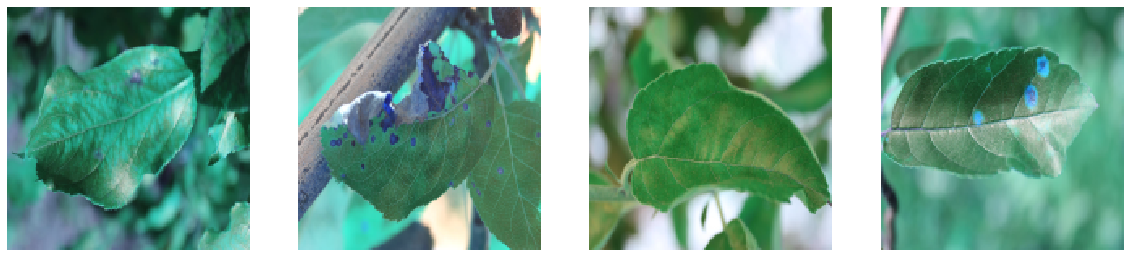

In [9]:
fig, axis = plt.subplots(1, 4, figsize=(20, 20))
for i in range(4):
    axis[i].set_axis_off()
    axis[i].imshow(train_image[i])
    #generate different pictures from the data set.

Now check some test images

In [10]:
test_image = []
for name in test['image_id']:
    path='plant-pathology-2020-fgvc7/images/'+name+'.jpg'
    img=cv2.imread(path)
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    test_image.append(image)

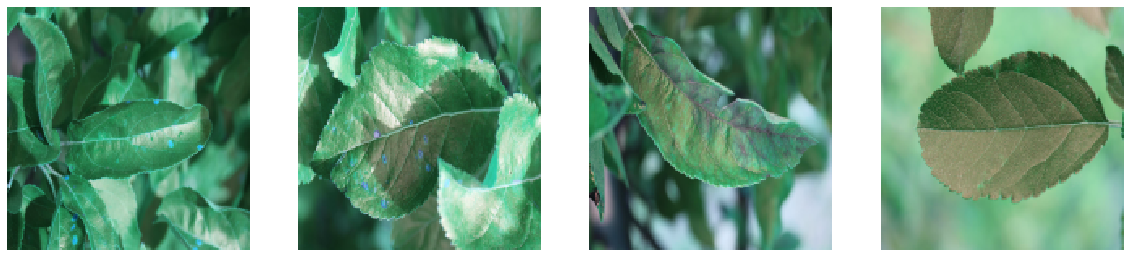

In [12]:
fig, axis = plt.subplots(1, 4, figsize=(20, 20))
for i in range(4):
    axis[i].set_axis_off()
    axis[i].imshow(test_image[i])
    # randint(0,1500)+
    #generate different pictures from the test data.

In [13]:
test_image[1]

array([[[ 27, 115,  69],
        [ 27, 107,  62],
        [ 25, 104,  60],
        ...,
        [ 60, 116,  81],
        [ 55, 112,  77],
        [ 51, 112,  76]],

       [[ 30, 113,  68],
        [ 27, 106,  62],
        [ 24, 102,  57],
        ...,
        [ 61, 117,  82],
        [ 56, 113,  77],
        [ 52, 112,  76]],

       [[ 33, 115,  72],
        [ 29, 106,  63],
        [ 25, 103,  59],
        ...,
        [ 63, 118,  83],
        [ 59, 114,  79],
        [ 55, 111,  76]],

       ...,

       [[ 32,  75,  52],
        [ 29,  72,  49],
        [ 26,  66,  46],
        ...,
        [ 75, 171, 118],
        [ 84, 176, 125],
        [ 94, 175, 127]],

       [[ 32,  73,  52],
        [ 29,  70,  48],
        [ 26,  66,  44],
        ...,
        [ 74, 172, 119],
        [ 77, 170, 115],
        [ 94, 170, 120]],

       [[ 32,  71,  51],
        [ 29,  69,  47],
        [ 26,  65,  44],
        ...,
        [ 81, 175, 121],
        [ 82, 175, 125],
        [ 93, 172, 124]]

In [14]:
#shape the training images to work for keras.
x_train = np.asarray(train_image, dtype=np.float32)
x_train = x_train/255

In [15]:
x_train.shape

(1821, 150, 150, 3)

In [16]:
x_test = np.asarray(test_image, dtype=np.float32)
x_test = x_test/255

In [17]:
x_test.shape

(1821, 150, 150, 3)

In [18]:
type(train)


pandas.core.frame.DataFrame

In [19]:
#grab the labels for the training images.
y = train.iloc[:,1:5]
# turn the labels into an arrray
y_train = np.array(y.values, dtype='float32')

In [20]:
#Check that the shape is correct.  1821 rows, 4 columns
#and check the value of the first row. should be floats
print(y_train.shape,y_train[0])

(1821, 4) [0. 0. 0. 1.]


In [21]:
#Set upthe training and validation split data

In [22]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size = 0.20, 
                                                  random_state = 403 )


In [23]:
x_val

array([[[[0.07450981, 0.27058825, 0.10980392],
         [0.07058824, 0.27058825, 0.11764706],
         [0.07450981, 0.27450982, 0.12156863],
         ...,
         [0.88235295, 0.99215686, 0.9764706 ],
         [0.85882354, 0.99607843, 0.972549  ],
         [0.827451  , 0.99607843, 0.9490196 ]],

        [[0.07843138, 0.27058825, 0.12156863],
         [0.07450981, 0.27450982, 0.12156863],
         [0.07450981, 0.2784314 , 0.12156863],
         ...,
         [0.8862745 , 0.99607843, 0.98039216],
         [0.85882354, 0.99607843, 0.96862745],
         [0.827451  , 0.99607843, 0.9529412 ]],

        [[0.07058824, 0.27450982, 0.11764706],
         [0.07450981, 0.2784314 , 0.11764706],
         [0.07843138, 0.28235295, 0.1254902 ],
         ...,
         [0.8901961 , 0.99607843, 0.9764706 ],
         [0.85882354, 1.        , 0.96862745],
         [0.83137256, 0.99607843, 0.9607843 ]],

        ...,

        [[0.15686275, 0.38039216, 0.23529412],
         [0.19215687, 0.42352942, 0.2784314 ]

#### Fully Connected Neural Network
fcnn
using softmax activation function and Stocastic gradient descent as the optimization function with a learning rate of 0.01

In [3]:
from keras.layers import Input, Dense, Activation, Flatten
from keras.optimizers import SGD, Adam
from keras.models import Model

Using TensorFlow backend.


In [4]:
# Get the size of the input images
# Height, Width, Channels
h, w, c = x_train[0].shape

NameError: name 'x_train' is not defined

In [26]:
print(h,w,c)

150 150 3


In [6]:
I = Input(shape=(150, 150, 3))

x = Flatten()(I)

x = Dense(60)(x)
x = Activation("tanh")(x)

x = Dense(60)(x)
x = Activation("tanh")(x)

# We output 10 values, one per class
x = Dense(4)(x)

# We use a "softmax" activation to make the 4 dimensional output vector
# satisfy the conditions of being a probability vector
x = Activation("softmax")(x)

fcnn = Model(inputs=I, outputs=x)

optimizer_1 = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
optimizer_2 = optimizer=SGD(lr=0.01)
   
fcnn.compile(loss="categorical_crossentropy", optimizer=optimizer_1, metrics=["accuracy"])

In [9]:
#!pip install keras-adabound
from keras_adabound import AdaBound
#fcnn.summary()

ModuleNotFoundError: No module named 'keras_adabound'

In [40]:
#This was really big when the images were resized to 225,over 9 million parameters!!!.  
#might have to resize my imputs. I did.  I set them to 150, and they went down to 

array([1., 0., 0., 0.], dtype=float32)

array([[[0.3137255 , 0.45490196, 0.3529412 ],
        [0.40392157, 0.5137255 , 0.4117647 ],
        [0.3372549 , 0.44705883, 0.29411766],
        ...,
        [0.4509804 , 0.60784316, 0.54901963],
        [0.43529412, 0.6431373 , 0.5803922 ],
        [0.41960785, 0.6745098 , 0.6117647 ]],

       [[0.30588236, 0.4392157 , 0.3529412 ],
        [0.34117648, 0.4627451 , 0.3372549 ],
        [0.3019608 , 0.42745098, 0.27450982],
        ...,
        [0.45490196, 0.5921569 , 0.5372549 ],
        [0.43529412, 0.6313726 , 0.5686275 ],
        [0.40784314, 0.6666667 , 0.6       ]],

       [[0.3254902 , 0.4509804 , 0.36078432],
        [0.29411766, 0.42745098, 0.28627452],
        [0.26666668, 0.40784314, 0.24313726],
        ...,
        [0.45490196, 0.5764706 , 0.52156866],
        [0.42352942, 0.6156863 , 0.5529412 ],
        [0.39607844, 0.64705884, 0.57254905]],

       ...,

       [[0.13725491, 0.25882354, 0.14117648],
        [0.12941177, 0.25490198, 0.13333334],
        [0.15686275, 0

In [44]:
fcnn.fit(x_train,
        y_train,
        batch_size = 32,
        epochs = 25,
        validation_data = (x_val,y_val))

Train on 1456 samples, validate on 365 samples
Epoch 1/25
1456/1456 [==============================] - 28s 20ms/step - loss: 1.2227 - accuracy: 0.3812 - val_loss: 1.2323 - val_accuracy: 0.3726
Epoch 2/25
1456/1456 [==============================] - 18s 13ms/step - loss: 1.2150 - accuracy: 0.3757 - val_loss: 1.2229 - val_accuracy: 0.3671
Epoch 3/25
1456/1456 [==============================] - 13s 9ms/step - loss: 1.1998 - accuracy: 0.4121 - val_loss: 1.2233 - val_accuracy: 0.3973
Epoch 4/25
1456/1456 [==============================] - 13s 9ms/step - loss: 1.1882 - accuracy: 0.4176 - val_loss: 1.2803 - val_accuracy: 0.3151
Epoch 5/25
1456/1456 [==============================] - 12s 8ms/step - loss: 1.1930 - accuracy: 0.4176 - val_loss: 1.2374 - val_accuracy: 0.3726
Epoch 6/25
1456/1456 [==============================] - 13s 9ms/step - loss: 1.1785 - accuracy: 0.4217 - val_loss: 1.2218 - val_accuracy: 0.3562
Epoch 7/25
1456/1456 [==============================] - 13s 9ms/step - loss: 1.17

In [45]:
test_image = x_val[0].reshape((1,150,150,3))

In [46]:
probs = fcnn.predict(test_image)

In [47]:
print(probs[0])

[0.4148854  0.04311003 0.3436853  0.19831927]


In [37]:
print(y_val[0])

[1. 0. 0. 0.]


In [51]:
predict= fcnn.predict(x_test)

In [66]:
prediction = np.ndarray(shape = (test.shape[0],4), dtype = np.float32)
for row in range(test.shape[0]):
    for col in range(4):
        if predict[row][col] == max(predict[row]):
            prediction[row][col] = 1
        else:
            prediction[row][col] = 0

In [80]:
prediction = pd.DataFrame(prediction)
prediction.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
df = pd.concat([test.image_id, prediction], axis = 1)

In [84]:
df.head()
df.tail()

,image_id,healthy,multiple_diseases,rust,scab
1816,Test_1816,1.0,0.0,0.0,0.0
1817,Test_1817,1.0,0.0,0.0,0.0
1818,Test_1818,1.0,0.0,0.0,0.0
1819,Test_1819,1.0,0.0,0.0,0.0
1820,Test_1820,1.0,0.0,0.0,0.0


In [85]:
df.to_csv('submission.csv', index = False)